In [419]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
fpath = "qubits3\chip_4_Q2_23.tif"
        

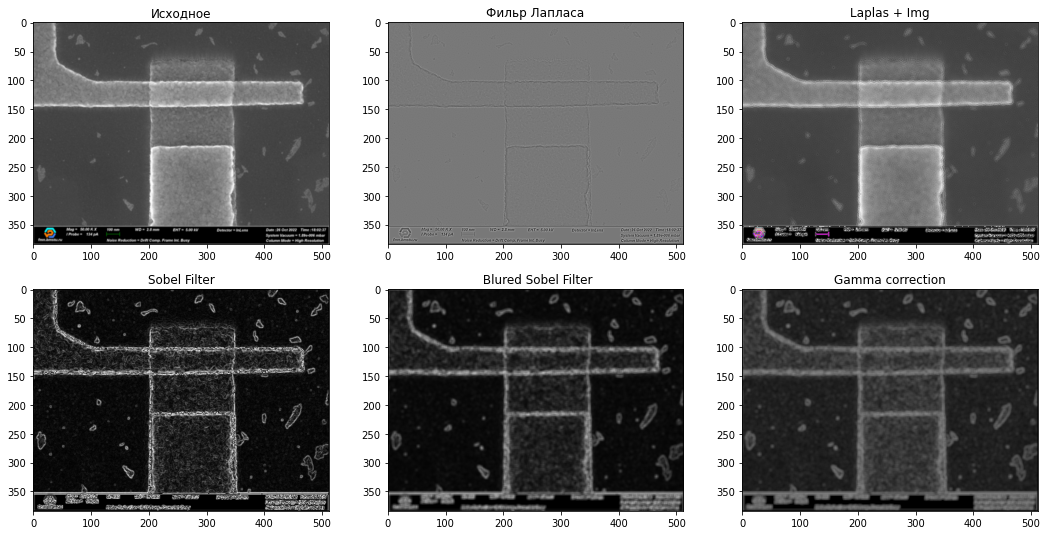

In [420]:
#Комбинирование методов обработки изображения

img = cv2.imread(fpath)
origin1 = cv2.pyrDown(img)
origin2 = cv2.pyrDown(origin1)
img2 = np.array(origin2)
strok, stolb, nums = img2.shape
matrix4 = np.zeros((strok, stolb, nums)).astype(np.uint8)
'''1---Laplas'''
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
plt.imsave('laplacian.png', laplacian, cmap = 'gray')
'''2---- Лаплас + Исходное'''
for i in range(strok-1):
    for j in range(stolb-1):
        matrix4[i][j] = [ laplacian[i][j], laplacian[i][j], laplacian[i][j] ]
mat_lap = matrix4
second = img2 + matrix4
'''3 ---  Sobel'''
for i in range(strok-1):
    for j in range(stolb-1):
           m1 = abs((img2[i+1][j-1][0] + 2*img2[i+1][j][0] + img2[i+1][j+1][0]) - (img2[i-1][j-1][0] + 2*img2[i-1][j][0] + img2[i-1][j+1][0]))
           m2 = abs((img2[i-1][j+1][0] + 2*img2[i][j+1][0] + img2[i+1][j][0]) - (img2[i-1][j-1][0] + 2*img2[i][j-1][0] + img2[i+1][j-1][0]))
           Mxy = m1 + m2
           matrix4[i][j] = [Mxy, Mxy, Mxy]

'''4 --- Blured image'''

blur_data = cv2.blur(matrix4, (5,5))
fig, axes = plt.subplots(2, 3)

'''5 - Gamma correction'''
fin = np.zeros((strok, stolb, nums)).astype(np.uint8)

for i in range(strok-1):
    for j in range(stolb-1):
            fin[i][j] = list(map(lambda x: 10*x**0.5, blur_data[i][j] ))
            
axes[0][0].imshow(img2)
axes[0][0].set_title('Исходное')

axes[0][1].set_title('Фильр Лапласа')
axes[0][1].imshow(laplacian, cmap='gray')

axes[0][2].set_title('Laplas + Img')
axes[0][2].imshow(second, cmap='gray')

axes[1][0].set_title('Sobel Filter')
axes[1][0].imshow(matrix4, cmap='gray')


axes[1][1].set_title(' Blured Sobel Filter')
axes[1][1].imshow(blur_data, cmap='gray')

axes[1][2].set_title('Gamma correction')
axes[1][2].imshow(fin, cmap='gray')

fig.set_figwidth(18)   
fig.set_figheight(9)
plt.show()



In [421]:
matrix99 = np.zeros((img2.shape[:2]))
strok, stolb = img2.shape[:2]
for i in range(strok -1):
    for j in range(stolb-1):
        matrix99[i][j] = blur_data[i][j][0]
        

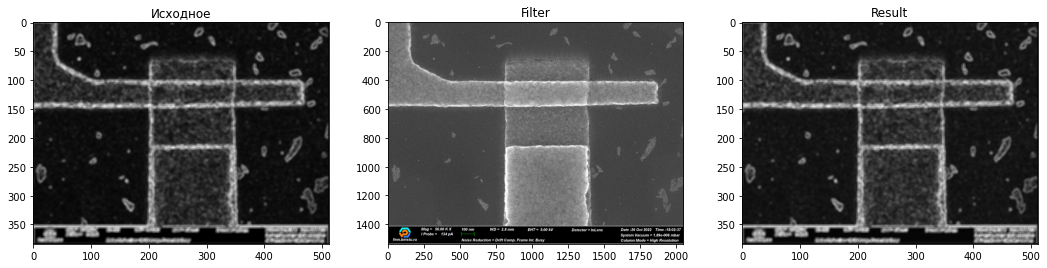

In [422]:
def laplacian(matr):
    lapl_f = np.zeros(matr.shape[:2])
    strok, stolb = matr.shape[:2]
    for i in range(strok-1):
        for j in range(stolb-1):
            lapl_f[i][j] = (-4)*np.power(np.pi, 2)*(np.power(i-strok//2, 2) + np.power(j-stolb//2, 2))
    return lapl_f
    
original = np.fft.fft2(matrix99)
center = np.fft.fftshift(original)
Laplfilter = center * laplacian(matrix99)
HighPass = np.fft.ifftshift(Laplfilter)
inverse_HighPass = np.fft.ifft2(HighPass)
final = matrix99 + (-1)*np.log(np.abs(inverse_HighPass)+1)


fig, axes = plt.subplots(1, 3)
axes[0].set_title('Исходное')
axes[0].imshow(matrix99, cmap='gray')

axes[1].set_title('Filter')
axes[1].imshow(img, cmap='gray')

axes[2].set_title('Result')
axes[2].imshow(final, cmap='gray')

fig.set_figwidth(18)   
fig.set_figheight(9)
plt.show()


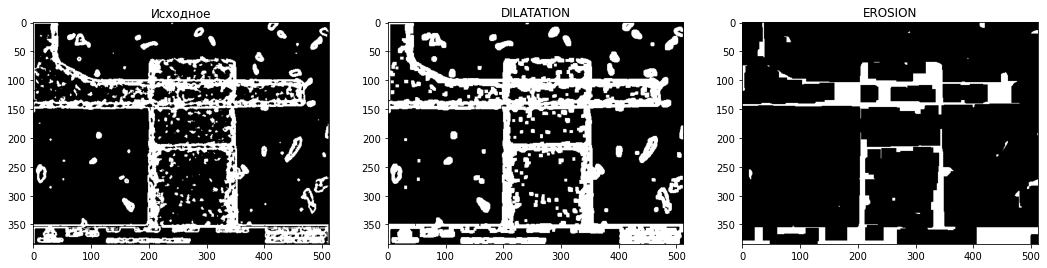

In [423]:
for i in range(strok-1):
    for j in range(stolb-1):
            if 30 < final[i][j] < 120:
                matrix99[i][j] = 255
            else:
                matrix99[i][j] = 0

kernel = np.ones((3, 3), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)
ker = np.ones((11, 11), np.uint8)
mer = np.ones((19, 19), np.uint8)
img_er = cv2.erode(matrix99, kernel, iterations=1)

img_dilation = cv2.dilate(img_er, kernel2, iterations=1)

img2 = cv2.dilate(img_dilation, ker, iterations=1)

img3 = cv2.erode(img2, kernel2, iterations=1)
img3 = cv2.erode(img3, mer, iterations=1)
fig, axes = plt.subplots(1, 3)

axes[0].set_title('Исходное')
axes[0].imshow(matrix99, cmap='gray')

axes[1].set_title('DILATATION')
axes[1].imshow(img_dilation, cmap='gray')

axes[2].set_title('EROSION')
axes[2].imshow(img3, cmap='gray')

fig.set_figwidth(18)   
fig.set_figheight(9)
plt.show()

101 147
[204, 205, 206, 207, 208, 209, 210, 211, 212, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347]
201 350


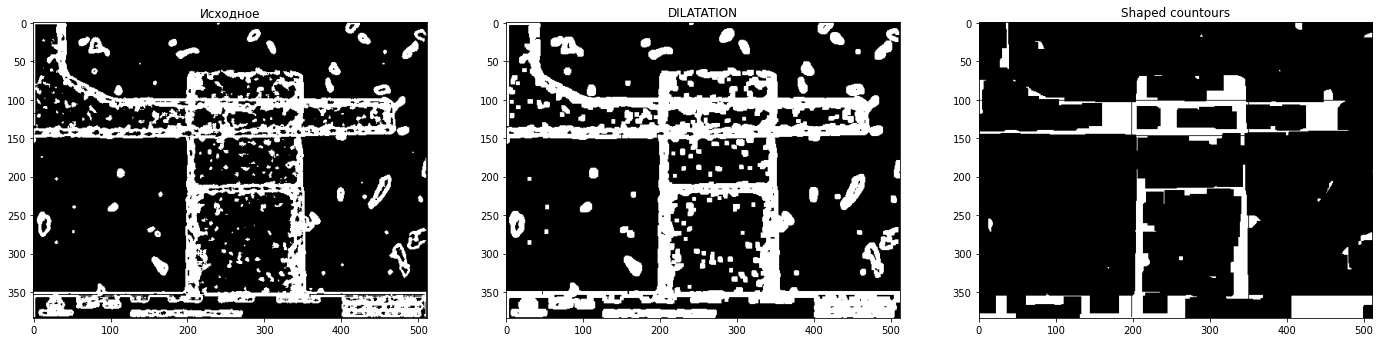

In [424]:

img90 = img3.T
def bounds_finder(image, condition):  
    spis1 = []
    m, s = image.shape
    for st, value in enumerate(image):
        marker = sum(image[st])
        if marker > 0 and marker/255 > condition and st > 50:
            spis1.append(st) 
    res = list(filter(lambda x: x<320, spis1))
    if (m,s) == (512, 384):
        res2 = list(filter(lambda x: 100 < x < 450, spis1))
        print(res2)
        print(min(res2)-3, max(res2)+3)
        return (min(res2)-6, max(res2)+3)
    else:
        print(min(spis1)-3, max(res)+3)
        return (min(spis1)-3, max(res)+3)

      
upper_row, lower_row = bounds_finder(img3, 280)          
left_col, right_col =  bounds_finder(img90, 150)  

     
def gran_remove(image, row1, row2, col1, col2):
    strok, stolb = image.shape
    nulls = np.zeros((1, stolb))
    for ind, val in enumerate(image):
        if ind == row1 or ind ==  row2:
            image[ind] = nulls
    iter = (col1, col2)
    for col in iter:
        for row in range(strok-1):
            image[row][col] = 0
        
    return image
image_fin = gran_remove(img3, upper_row, lower_row , left_col, right_col)
fig, axes = plt.subplots(1, 3)

axes[0].set_title('Исходное')
axes[0].imshow(matrix99, cmap='gray')

axes[1].set_title('DILATATION')
axes[1].imshow(img_dilation, cmap='gray')

axes[2].set_title('Shaped countours')
axes[2].imshow(image_fin, cmap='gray')

fig.set_figwidth(24)   
fig.set_figheight(12)
plt.show()


     

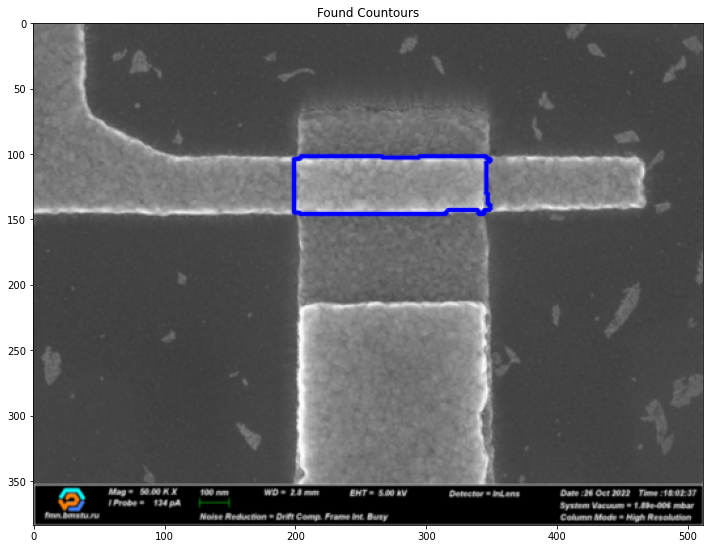

0.10201


In [425]:
st, sl = image_fin.shape
last = np.zeros((st, sl, 3))
lalka = np.zeros((st, sl, 3))
for i in range(st-1):
    for j in range(sl-1):
        a = img3[i][j]
        lalka[i][j] = [a, a, a]
        if upper_row < i < lower_row + 1  and  left_col < j < right_col + 1:
            last[i][j] = [a, a, a]
        else:
            last[i][j] = [0, 0, 0]
laq= origin2           
new = np.array(lalka, dtype='uint8')
gray = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
''' contouring'''
new2 = np.array(last, dtype='uint8')
gray2 = cv2.cvtColor(new2, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2] 
cv2.drawContours(laq, cnts, -1, (0, 0, 255), 2, cv2.LINE_AA) 

koeff = 16 * 100 / 100 / 1000000
area = list(map(lambda x: round(cv2.contourArea(x)*koeff, 5), cnts))
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
target = find_nearest(area, 0.11)
# target = max(area) 
name = fpath[8:-4]
plt.figure(figsize=(12,24))
plt.title('Found Countours')
plt.imshow(laq, cmap= 'gray')
plt.show()
cv2.imwrite(f'res\{name}.png', laq)
print(target)



